In [251]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [204]:
df = pd.read_csv('/Users/adamo/Documents/Bootcamp/Week 4/labs/data/amz_uk_price_prediction_dataset.csv')

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



In [205]:
# **Objective**: Understand the relationship between product categories and their best-seller status.

# 1. **Crosstab Analysis**:
#     - Create a crosstab between the product `category` and the `isBestSeller` status.
    
#     - Are there categories where being a best-seller is more prevalent? 
    	
#     	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


# 2. **Statistical Tests**:
#     - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#     - Compute Cramér's V to understand the strength of association between best-seller status and category.

# 3. **Visualizations**:
# 	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [206]:
 #**Crosstab Analysis**:
#     - Create a crosstab between the product `category` and the `isBestSeller` status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])


#     - Are there categories where being a best-seller is more prevalent? 
#     	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*
test = pd.DataFrame(crosstab_result)


In [207]:
test['ratio'] = (test[True]/(test[True]+test[False]))*100

In [208]:
test = test.sort_values


In [272]:
test2 = pd.DataFrame(test)

ValueError: DataFrame constructor not properly called!

In [273]:


# keeping only categories with more than 2%
test2 = test2[test2['ratio'] > 2]
test2 = test2.sort_values('ratio', ascending=False)
test2.head(10)

isBestSeller,False,True,ratio
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
"Billiard, Snooker & Pool",241,8,3.212851
Pet Supplies,9152,285,3.020028
Home Brewing & Wine Making,239,7,2.845528
Wind Instruments,243,7,2.800000


In [ ]:
## **Statistical Tests**:
#     - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#     - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [ ]:
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

# p-value of 0.0 indicates that there is assosiation between the two categories?

(36540.20270061387, 0.0)

In [ ]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.

In [221]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

# Value 0.12 indicates weak association between category and best-seller status

0.1222829439760564

In [ ]:
 3. **Visualizations**:
# 	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

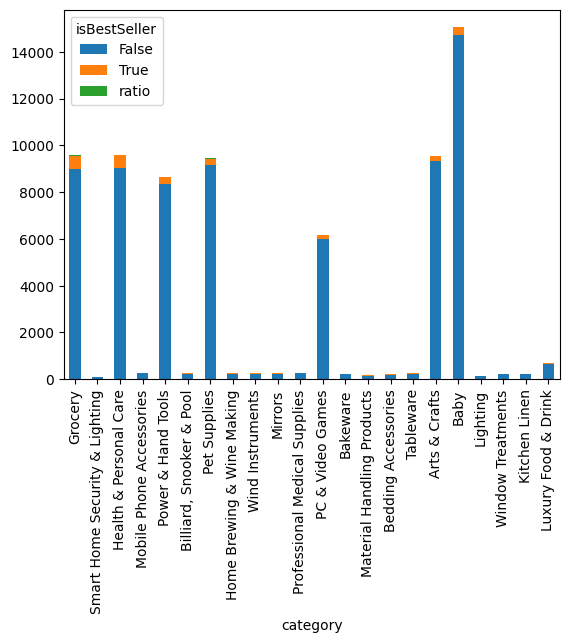

In [ ]:
test2.plot(kind="bar", stacked=True, orientation='vertical')

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [ ]:
def remove_outliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    no_outliers = [x for x in data[col] if (x > lower_bound) & (x < upper_bound)]
    filtered_data = data.loc[data[col].isin(no_outliers)]

    return filtered_data

In [270]:
df2= remove_outliers(df, 'price')



In [220]:
#  **Violin Plots**:
#     - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
#     - Which product category tends to have the highest median price? Don't filter here by top categories.


In [231]:
print(f"Categories with the highest median are:\n\n{df2.groupby('category')['price'].median().sort_values(ascending=False).head(10)}")
            

Categories with the highest median are:

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64


In [236]:
top20= list(df2['category'].value_counts().head(20).index)
top20

['Sports & Outdoors',
 'Beauty',
 'Bath & Body',
 'Manicure & Pedicure Products',
 'Handmade Clothing, Shoes & Accessories',
 'Make-up',
 'Skin Care',
 'Hair Care',
 'Birthday Gifts',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Luggage and travel gear',
 'Women',
 'Fragrances',
 'Handmade Kitchen & Dining',
 'Handmade Artwork',
 'Handmade Home & Kitchen Products',
 'Handmade Jewellery',
 'Men',
 'Baby']

In [239]:
new_df = df2.loc[df2['category'].isin(top20)]

/var/folders/2n/0zc5p_q960ggjwt11ytfzc1h0000gp/T/ipykernel_84290/3548911955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=new_df, x='price', y='category', palette="coolwarm", inner="points", ax=ax)


<Axes: xlabel='price', ylabel='category'>

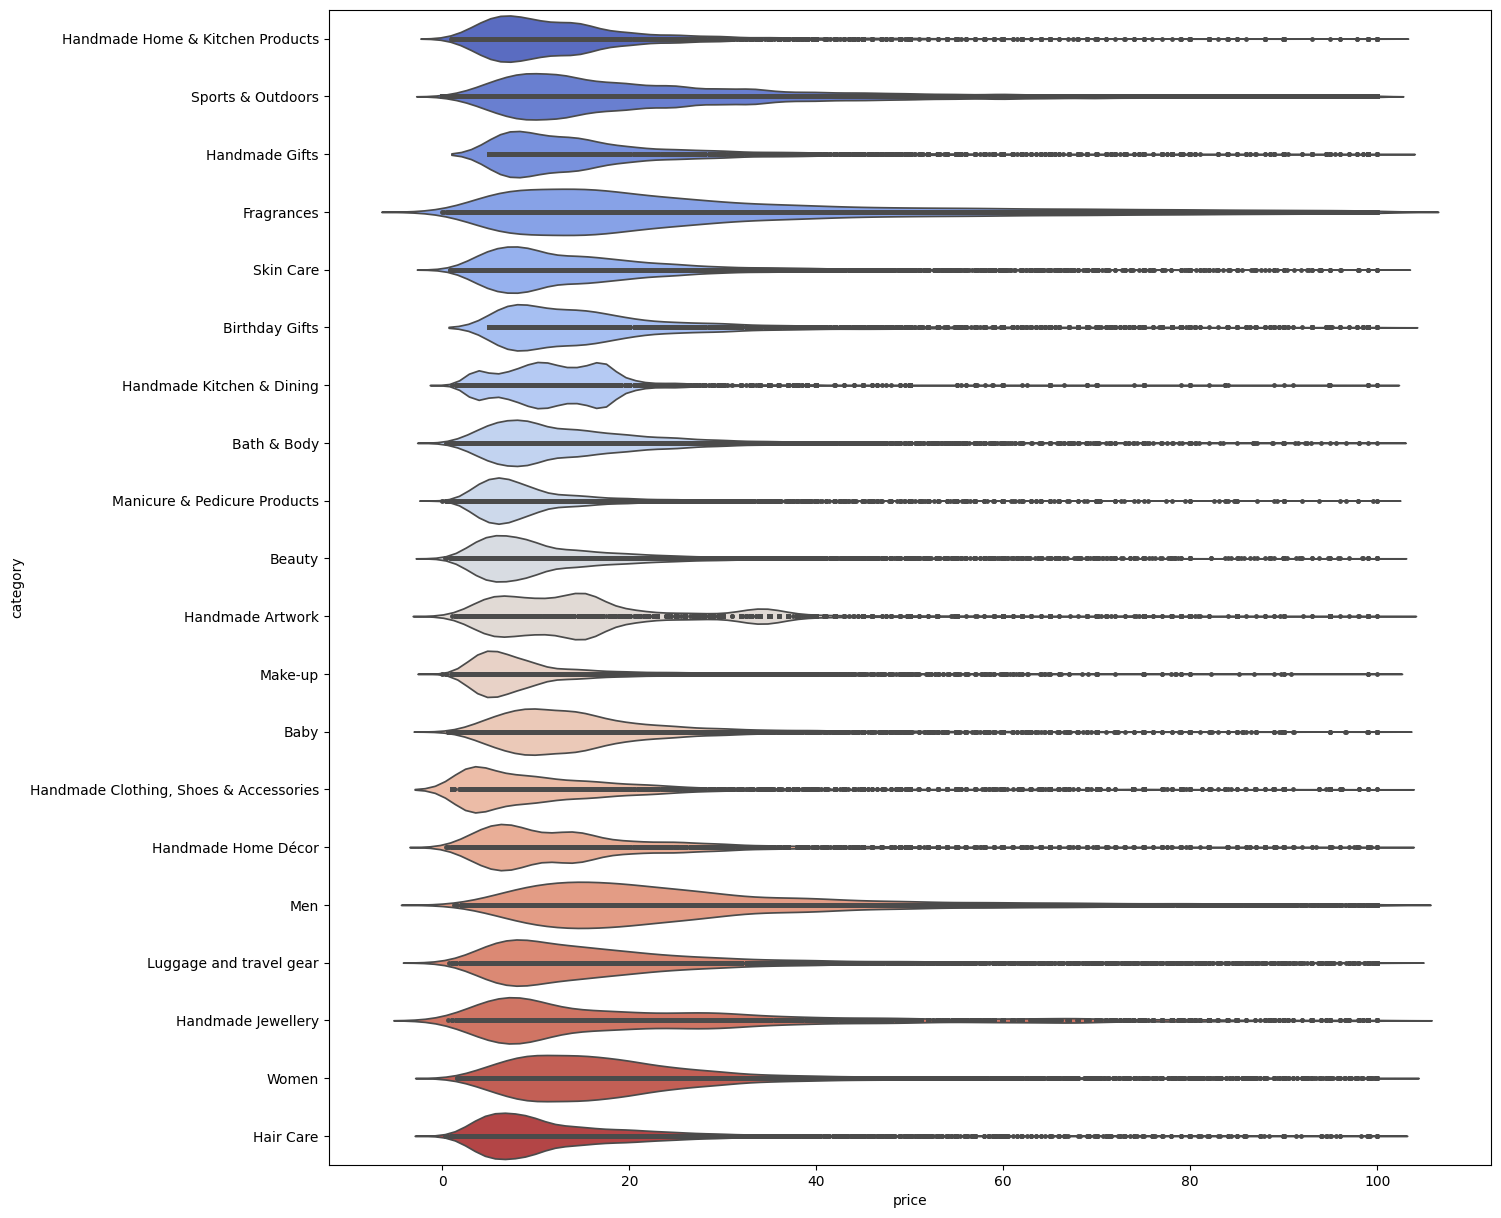

In [256]:
import matplotlib
# sns.violinplot(data=new_df, x='price', y='category', palette="coolwarm")
fig, ax= plt.subplots()

fig.set_size_inches(15, 15)
sns.violinplot(data=new_df, x='price', y='category', palette="coolwarm", inner="points", ax=ax)    


In [ ]:
# 2. **Bar Charts**:
#     - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#     - Which product category commands the highest average price? Don't filter here by top categories.

In [234]:
top10= list(df2['category'].value_counts().head(10).index)
top10

['Sports & Outdoors',
 'Beauty',
 'Bath & Body',
 'Manicure & Pedicure Products',
 'Handmade Clothing, Shoes & Accessories',
 'Make-up',
 'Skin Care',
 'Hair Care',
 'Birthday Gifts',
 'Handmade Gifts']

In [241]:
df_top10 = df2.loc[df2['category'].isin(top10)]

/var/folders/2n/0zc5p_q960ggjwt11ytfzc1h0000gp/T/ipykernel_84290/358604779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='price', y='category', palette="coolwarm", ax=ax)


<Axes: xlabel='price', ylabel='category'>

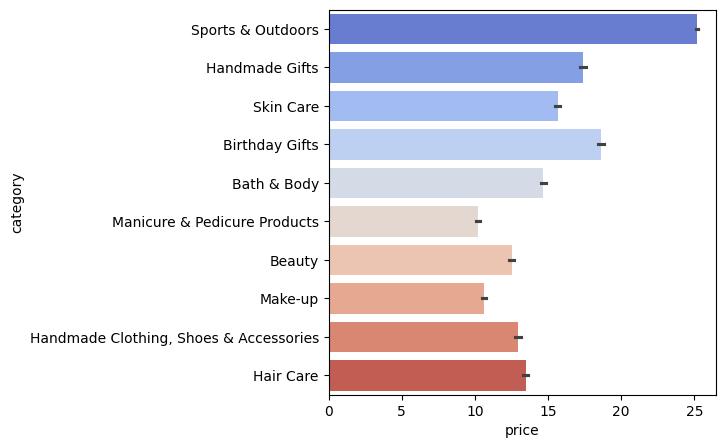

In [275]:
fig, ax= plt.subplots()
fig.set_size_inches(5, 5)
sns.barplot(data=df_top10, x='price', y='category', palette="coolwarm", ax=ax)



In [243]:
print(f"Categories with the highest average price are:\n\n{df2.groupby('category')['price'].mean().sort_values(ascending=False).head(10)}")


Categories with the highest average price are:

category
Motherboards         68.772432
Boxing Shoes         67.417803
Desktop PCs          66.915562
Tablets              66.552971
Graphics Cards       65.103509
Digital Frames       60.745129
Streaming Clients    60.241803
Hockey Shoes         60.094796
Computer Cases       58.339884
Skiing Poles         57.867770
Name: price, dtype: float64


In [ ]:
#  **Box Plots**:
#     - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#     - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/2n/0zc5p_q960ggjwt11ytfzc1h0000gp/T/ipykernel_84290/2419839433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='stars', y='category', palette="coolwarm", ax=ax)


<Axes: xlabel='stars', ylabel='category'>

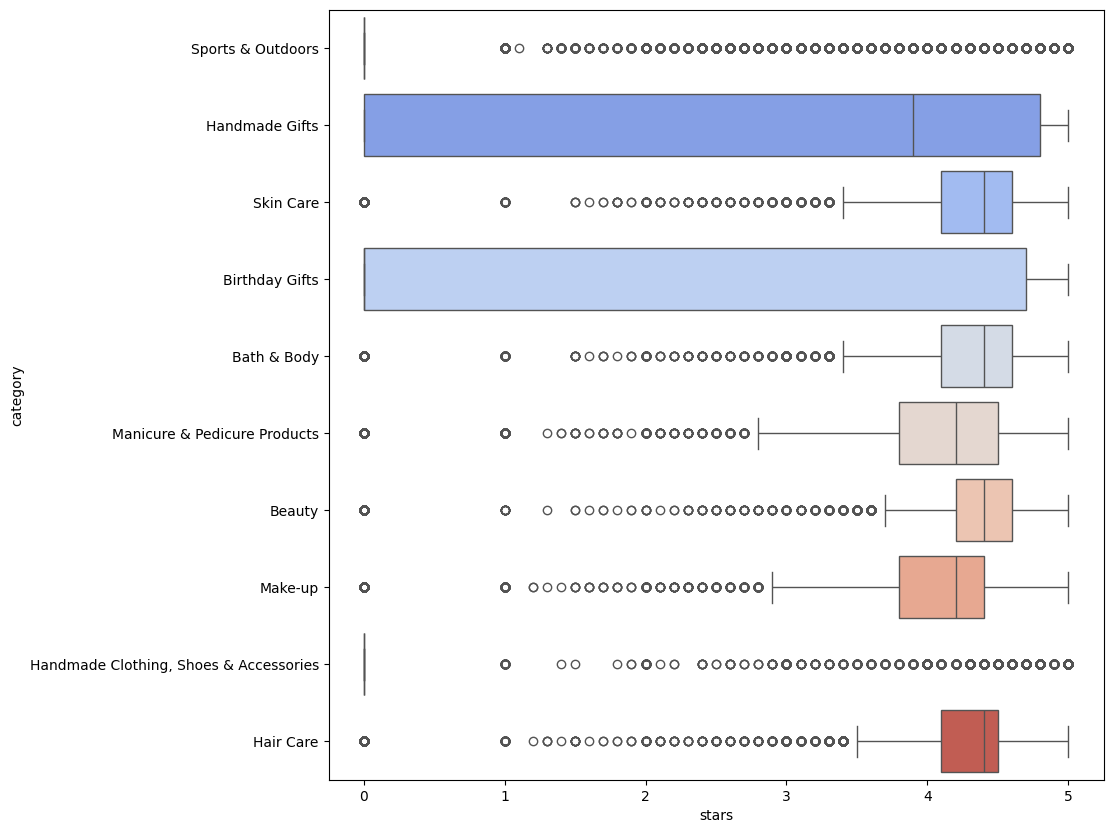

In [263]:
fig, ax= plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_top10, x='stars', y='category', palette="coolwarm", ax=ax)

In [264]:
print(f"Categories with the highest median rating are:\n\n{df2.groupby('category')['stars'].median().sort_values(ascending=False).head(10)}")


Categories with the highest median rating are:

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Cables & Accessories            4.5
CPUs                            4.5
Name: stars, dtype: float64


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

In [267]:
# 1. **Correlation Coefficients**:
#     - Calculate the correlation coefficient between `price` and `stars`.
#     - Is there a significant correlation between product price and its rating?


correlation = df2['price'].corr(df['stars'])
correlation

# The correlation coefficient of approximately -0.077 suggests a weak negative correlation between the price of products 
#  and their corresponding star ratings. 

-0.07767299878181444

In [ ]:
# 2. **Visualizations**:
#     - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#     - Use a correlation heatmap to visualize correlations between all numerical variables.


<Axes: xlabel='stars', ylabel='price'>

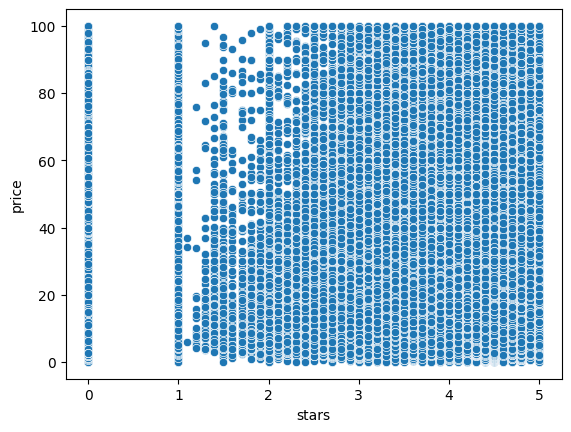

In [271]:
sns.scatterplot(data=df2, x='stars', y='price')

# The scatter plot shows that there is no corelation between price and rarting. 

In [281]:
#- Use a correlation heatmap to visualize correlations between all numerical variables.
#Checking for numerical variables
df2.select_dtypes("number").nunique().sort_values(ascending=False)


uid                  2115963
reviews                19136
price                  10000
stars                     42
boughtInLastMonth         25
dtype: int64

In [288]:
df2['stars'].unique()
# The result indicates that rating is not a numerical variable


array([4.7, 4.6, 4.5, 4.8, 4.4, 4.9, 4.3, 3.8, 4.1, 4.2, 3.9, 4. , 3.4,
       3.6, 5. , 3.2, 3.3, 0. , 3.5, 3.7, 3. , 2.7, 1. , 2.5, 2. , 2.9,
       2.8, 3.1, 1.5, 2.2, 2.1, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [290]:
df2['boughtInLastMonth'].unique()
# The result indicates that it is not a numerical variable

array([    0,   600,  1000,   200,   100,    50,  2000,   800,   700,
         500,   400,   300,   900,  4000,  3000,  5000,  9000,  7000,
        6000, 50000, 20000, 10000,  8000, 30000, 40000])

In [ ]:
# we could also drop uid 

In [310]:
numerical = df2.select_dtypes("number").drop(['stars', 'boughtInLastMonth', 'uid'], axis=1)
numerical 

,reviews,price
0,15308,21.99
1,98099,23.99
2,15308,21.99
3,7205,31.99
4,1881,17.99
...,...,...
2443646,0,22.34
2443647,0,97.99
2443648,0,52.99
2443649,404,79.99


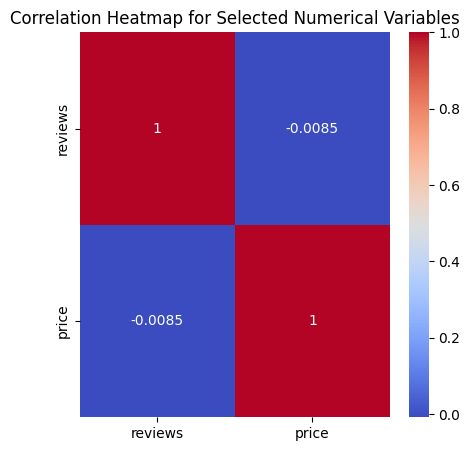

In [311]:
correlation_matrix = numerical.corr()

plt.figure(figsize=(5, 5))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

# Heatmap indicates that there is very weak corelation between price and number of reviews.

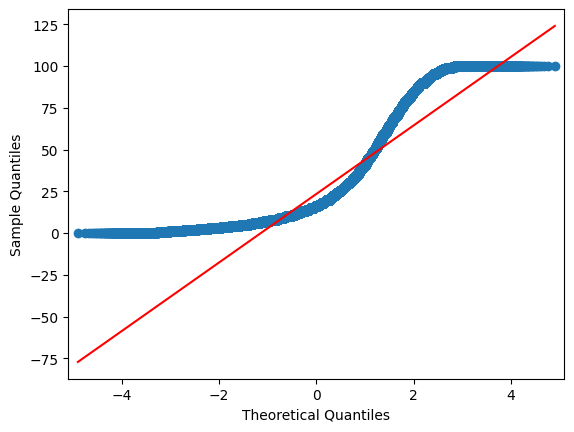

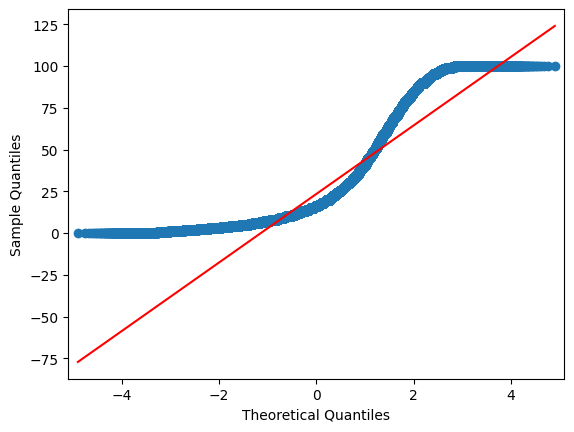

In [313]:
# Examine if product prices typically follow a normal distribution using a QQ plot. 

import statsmodels.api as sm

sm.qqplot(df2['price'], line='s')

# The distribution of the price do not follow normal distribution